In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# ========== 1. Load Data ==========
data_path = r'D:\waste_management\data\raw\waste_data.csv'  # Adjust path accordingly
df = pd.read_csv(data_path)

print("Data Loaded. First 5 rows:")
display(df.head())

Data Loaded. First 5 rows:


,City/District,Waste Type,Waste Generated (Tons/Day),Recycling Rate (%),Population Density (People/km²),Municipal Efficiency Score (1-10),Disposal Method,Cost of Waste Management (₹/Ton),Awareness Campaigns Count,Landfill Name,"Landfill Location (Lat, Long)",Landfill Capacity (Tons),Year
0,Mumbai,Plastic,6610,68,11191,9,Composting,3056,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
1,Mumbai,Organic,1181,56,11191,5,Composting,2778,12,Mumbai Landfill,"22.4265, 77.4931",45575,2019
2,Mumbai,E-Waste,8162,53,11191,8,Incineration,3390,13,Mumbai Landfill,"22.4265, 77.4931",45575,2019
3,Mumbai,Construction,8929,56,11191,5,Landfill,1498,14,Mumbai Landfill,"22.4265, 77.4931",45575,2019
4,Mumbai,Hazardous,5032,44,11191,7,Recycling,2221,16,Mumbai Landfill,"22.4265, 77.4931",45575,2019


========== 2. Basic Info & Missing Values ==========

In [6]:
print("\nDataset Info:")
display(df.info())

print("\nMissing values per column:")
missing_counts = df.isnull().sum()
display(missing_counts)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   City/District                      850 non-null    object
 1   Waste Type                         850 non-null    object
 2   Waste Generated (Tons/Day)         850 non-null    int64 
 3   Recycling Rate (%)                 850 non-null    int64 
 4   Population Density (People/km²)    850 non-null    int64 
 5   Municipal Efficiency Score (1-10)  850 non-null    int64 
 6   Disposal Method                    850 non-null    object
 7   Cost of Waste Management (₹/Ton)   850 non-null    int64 
 8   Awareness Campaigns Count          850 non-null    int64 
 9   Landfill Name                      850 non-null    object
 10  Landfill Location (Lat, Long)      850 non-null    object
 11  Landfill Capacity (Tons)           850 non-null    int64

None


Missing values per column:


City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Location (Lat, Long)        0
Landfill Capacity (Tons)             0
Year                                 0
dtype: int64

========== 3. Handle Missing Values ==========

In [8]:
#Numeric columns
numeric_cols = [
    'Waste Generated (Tons/Day)', 'Recycling Rate (%)', 'Population Density (People/km²)',
    'Municipal Efficiency Score (1-10)', 'Cost of Waste Management (₹/Ton)', 
    'Awareness Campaigns Count', 'Landfill Capacity (Tons)'
]

In [9]:
# Categorical columns
categorical_cols = ['City/District', 'Waste Type', 'Disposal Method', 'Landfill Name']

In [10]:
# Geospatial column combined
geo_col_combined = 'Landfill Location (Lat, Long)'

In [11]:
# Handle numeric missing values with median
for col in numeric_cols:
    if col in df.columns:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing numeric '{col}' with median: {median_val}")

Filled missing numeric 'Waste Generated (Tons/Day)' with median: 5283.0
Filled missing numeric 'Recycling Rate (%)' with median: 56.0
Filled missing numeric 'Population Density (People/km²)' with median: 12579.5
Filled missing numeric 'Municipal Efficiency Score (1-10)' with median: 7.0
Filled missing numeric 'Cost of Waste Management (₹/Ton)' with median: 2853.0
Filled missing numeric 'Awareness Campaigns Count' with median: 10.0
Filled missing numeric 'Landfill Capacity (Tons)' with median: 61038.5


In [12]:
# Handle categorical missing values with 'Unknown'
for col in categorical_cols:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)
        print(f"Filled missing categorical '{col}' with 'Unknown'")

Filled missing categorical 'City/District' with 'Unknown'
Filled missing categorical 'Waste Type' with 'Unknown'
Filled missing categorical 'Disposal Method' with 'Unknown'
Filled missing categorical 'Landfill Name' with 'Unknown'


In [13]:
# Handle geospatial column: split and fill missing with forward & backward fill
if geo_col_combined in df.columns:
    df[['Landfill_Lat', 'Landfill_Long']] = df[geo_col_combined].str.split(',', expand=True)
    df['Landfill_Lat'] = pd.to_numeric(df['Landfill_Lat'], errors='coerce')
    df['Landfill_Long'] = pd.to_numeric(df['Landfill_Long'], errors='coerce')
    # Drop original combined column
    df.drop(columns=[geo_col_combined], inplace=True)

    for col in ['Landfill_Lat', 'Landfill_Long']:
        df[col].fillna(method='ffill', inplace=True)
        df[col].fillna(method='bfill', inplace=True)
        remaining_nulls = df[col].isnull().sum()
        print(f"Remaining missing values in {col}: {remaining_nulls}")

Remaining missing values in Landfill_Lat: 0
Remaining missing values in Landfill_Long: 0


In [14]:
# Confirm no missing values remain
print("\nMissing values after imputation:")
display(df.isnull().sum())


Missing values after imputation:


City/District                        0
Waste Type                           0
Waste Generated (Tons/Day)           0
Recycling Rate (%)                   0
Population Density (People/km²)      0
Municipal Efficiency Score (1-10)    0
Disposal Method                      0
Cost of Waste Management (₹/Ton)     0
Awareness Campaigns Count            0
Landfill Name                        0
Landfill Capacity (Tons)             0
Year                                 0
Landfill_Lat                         0
Landfill_Long                        0
dtype: int64

========== 4. Data Type Correction ==========

In [15]:

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

if 'Year' in df.columns:
    df['Year'] = df['Year'].astype(int)

========== 5. Outlier Treatment ==========


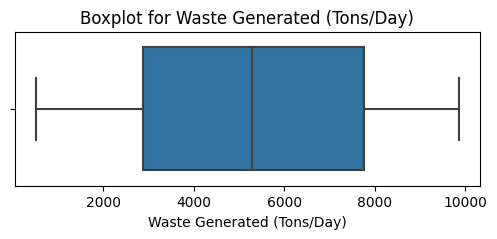

Capped 'Waste Generated (Tons/Day)' at 99th percentile: 9850.3409


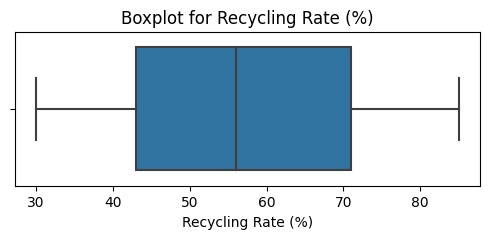

Capped 'Recycling Rate (%)' at 99th percentile: 85.0


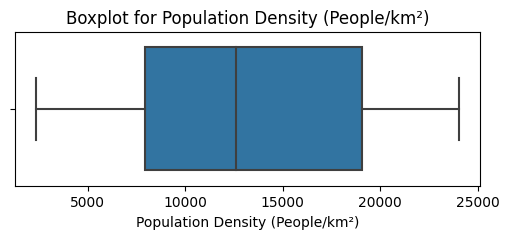

Capped 'Population Density (People/km²)' at 99th percentile: 24032.0


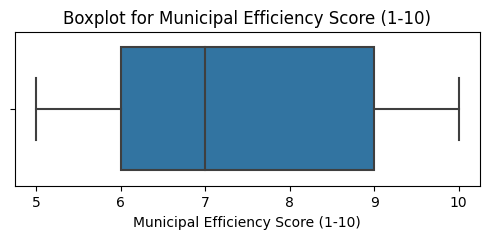

Capped 'Municipal Efficiency Score (1-10)' at 99th percentile: 10.0


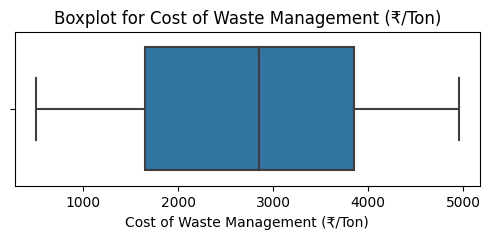

Capped 'Cost of Waste Management (₹/Ton)' at 99th percentile: 4952.0


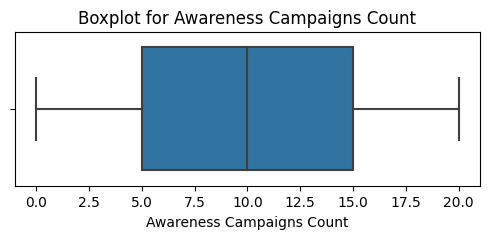

Capped 'Awareness Campaigns Count' at 99th percentile: 20.0


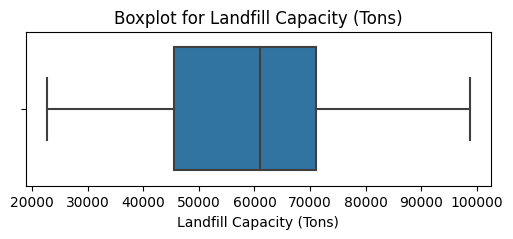

Capped 'Landfill Capacity (Tons)' at 99th percentile: 98646.0


In [17]:
#Visualize numeric columns for outliers
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(6,2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

        # Cap at 99th percentile to reduce skew impact
        cap_value = df[col].quantile(0.99)
        df[col] = np.where(df[col] > cap_value, cap_value, df[col])
        print(f"Capped '{col}' at 99th percentile: {cap_value}")

In [18]:
# Waste per capita (kg/person/day)
df['Waste_Per_Capita_kg'] = 1000 * df['Waste Generated (Tons/Day)'] / df['Population Density (People/km²)']

# Landfill Utilization ratio (waste generated per day / landfill capacity)
df['Landfill_Utilization_Ratio'] = df['Waste Generated (Tons/Day)'] / df['Landfill Capacity (Tons)']

# Avoid division by zero or NaN for Awareness Campaigns Count
df['Awareness Campaigns Count'] = df['Awareness Campaigns Count'].replace(0, np.nan)
df['Cost_Per_Campaign'] = df['Cost of Waste Management (₹/Ton)'] / df['Awareness Campaigns Count']
# Replace infinite or NaN with zero (or any suitable value)
df['Cost_Per_Campaign'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['Cost_Per_Campaign'].fillna(0, inplace=True)

# Cyclic encoding of Year (if column exists)
if 'Year' in df.columns:
    max_year = df['Year'].max()
    df['Year_Sin'] = np.sin(2 * np.pi * df['Year'] / max_year)
    df['Year_Cos'] = np.cos(2 * np.pi * df['Year'] / max_year)

In [19]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nColumns after one-hot encoding:")
print(df_encoded.columns)


Columns after one-hot encoding:
Index(['Waste Generated (Tons/Day)', 'Recycling Rate (%)',
       'Population Density (People/km²)', 'Municipal Efficiency Score (1-10)',
       'Cost of Waste Management (₹/Ton)', 'Awareness Campaigns Count',
       'Landfill Capacity (Tons)', 'Year', 'Landfill_Lat', 'Landfill_Long',
       'Waste_Per_Capita_kg', 'Landfill_Utilization_Ratio',
       'Cost_Per_Campaign', 'Year_Sin', 'Year_Cos', 'City/District_Ahmedabad',
       'City/District_Allahabad', 'City/District_Amritsar',
       'City/District_Bengaluru', 'City/District_Bhopal',
       'City/District_Chennai', 'City/District_Coimbatore',
       'City/District_Delhi', 'City/District_Guwahati',
       'City/District_Gwalior', 'City/District_Hyderabad',
       'City/District_Indore', 'City/District_Jabalpur',
       'City/District_Jaipur', 'City/District_Jodhpur', 'City/District_Kanpur',
       'City/District_Kolkata', 'City/District_Lucknow',
       'City/District_Ludhiana', 'City/District_Madurai

========== 8. Save Cleaned and Processed Data ==========

In [22]:
processed_folder = 'D:\waste_management\data\processed'
os.makedirs(processed_folder, exist_ok=True)

cleaned_path = os.path.join(processed_folder, 'waste_data_cleaned.csv')
encoded_path = os.path.join(processed_folder, 'waste_data_encoded.csv')

df.to_csv(cleaned_path, index=False)
print(f"Cleaned data saved to {cleaned_path}")

df_encoded.to_csv(encoded_path, index=False)
print(f"Encoded data saved to {encoded_path}")

Cleaned data saved to D:\waste_management\data\processed\waste_data_cleaned.csv
Encoded data saved to D:\waste_management\data\processed\waste_data_encoded.csv


========== 9. Summary ==========

In [23]:

print("\nSummary:")
print(f"Dataset shape before encoding: {df.shape}")
print(f"Dataset shape after encoding: {df_encoded.shape}")


Summary:
Dataset shape before encoding: (850, 19)
Dataset shape after encoding: (850, 88)
